In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load Fraud_Data file
fraud_data = pd.read_csv("./Fraud_Data.csv")
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
#Load IpAddress_to_Country.csv
ip_data = pd.read_csv("./IpAddress_to_Country.csv")
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [4]:
# No of rows & columns
fraud_data.shape

(151112, 11)

In [5]:
# No of rows & columns
ip_data.shape

(138846, 3)

In [6]:
#Define a function that matches the ip address from upper and lower bound ip address to the country
def map_ip_address_to_country(ip_address):
    countries=ip_data.loc[(ip_data['upper_bound_ip_address'] >= ip_address) & (ip_data['lower_bound_ip_address'] <= ip_address),'country'].values

    if len(countries)==0:
        return np.nan
    return countries[0]

In [7]:
#To map country with corresponding Ip address in Fraud_Data
fraud_data['country'] = fraud_data['ip_address'].apply(lambda row: map_ip_address_to_country(row))
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [8]:
#Deleting the NaN from country
fraud_data=fraud_data.dropna()

In [9]:
# To find the data distribution for the target variable
fraud_data['class'].value_counts(normalize=True)* 100

0    90.500674
1     9.499326
Name: class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ccf6978>]],
      dtype=object)

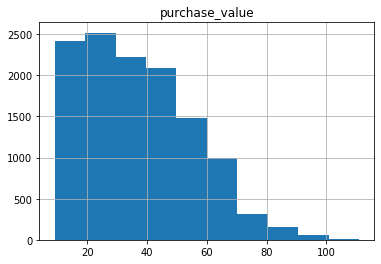

In [10]:
#Histogram for purchase value (Fraud)
fraud_data.loc[fraud_data["class"]==1].hist(column='purchase_value', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d749da0>]],
      dtype=object)

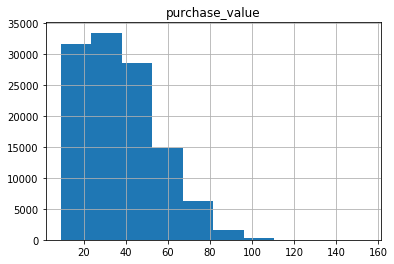

In [11]:
#Histogram for purchase value (No-Fraud)
fraud_data.loc[fraud_data["class"]==0].hist(column='purchase_value', bins=10)

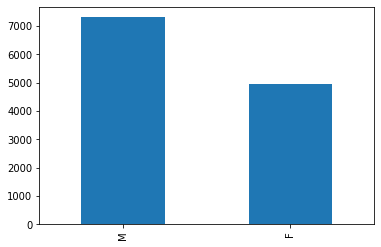

In [12]:
#Bar chart for sex (Fraud)
fraud_data.loc[fraud_data["class"]==1]['sex'].value_counts().plot.bar()

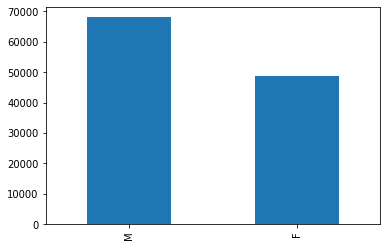

In [13]:
#Bar chart for sex (No-Fraud)
fraud_data.loc[fraud_data["class"]==0]['sex'].value_counts().plot.bar()

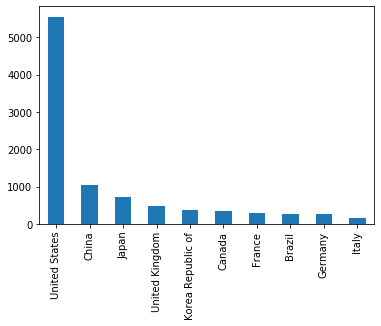

In [14]:
#Bar chart for country (Fraud)
fraud_data.loc[fraud_data["class"]==1]['country'].value_counts()[:10].plot.bar()

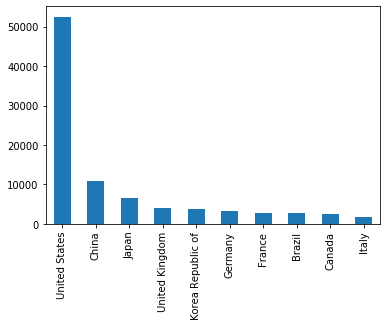

In [15]:
#Bar chart for country (No-Fraud)
fraud_data.loc[fraud_data["class"]==0]['country'].value_counts()[:10].plot.bar()

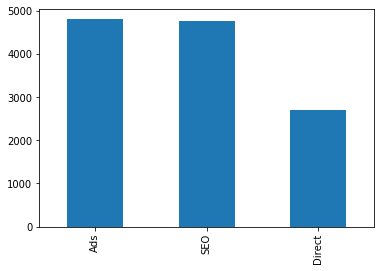

In [16]:
#Bar chart for source (fraud)
fraud_data.loc[fraud_data["class"]==1]['source'].value_counts().plot.bar()

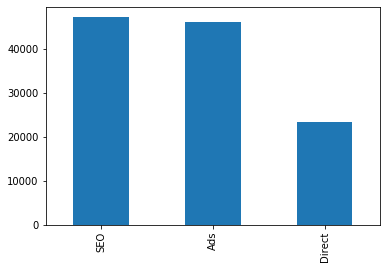

In [17]:
#Bar chart for source (No-fraud)
fraud_data.loc[fraud_data["class"]==0]['source'].value_counts().plot.bar()

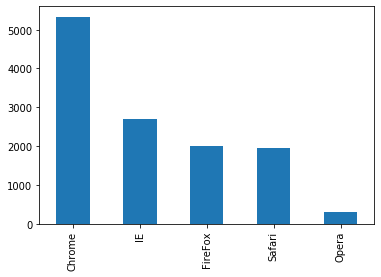

In [18]:
#Bar chart for browser (Fraud)
fraud_data.loc[fraud_data["class"]==1]['browser'].value_counts().plot.bar()

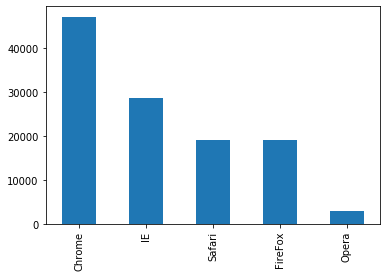

In [19]:
#Bar chart for browser (No-Fraud)
fraud_data.loc[fraud_data["class"]==0]['browser'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1200869e8>]],
      dtype=object)

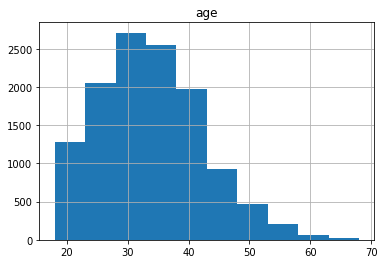

In [20]:
#Histogram for age (Fraud)
fraud_data.loc[fraud_data["class"]==1].hist(column='age', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1201b0208>]],
      dtype=object)

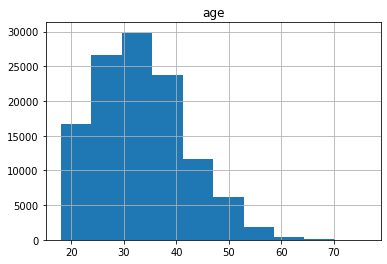

In [21]:
#Histogram for age (No-Fraud)
fraud_data.loc[fraud_data["class"]==0].hist(column='age', bins=10)

In [22]:
#Find top 10 devices with Fraud
fraud_data.loc[fraud_data["class"]==1]['device_id'].value_counts()[:10]

CQTUVBYIWWWBC    19
ZUSVMDEZRBDTX    19
KIPFSCNUGOLDP    19
EQYVNEGOFLAWK    19
NGQCKIADMZORL    19
CDFXVYHOIHPYP    18
BWSMVSLCJXMCM    18
SDJQRPKXQFBED    18
EGLGSEGYPMMAM    18
IGKYVZDBEGALB    18
Name: device_id, dtype: int64

In [23]:
#Find top 10 devices with No-Fraud
fraud_data.loc[fraud_data["class"]==0]['device_id'].value_counts()[:10]

ESTKJLLKCHBMW    3
JBBQCXMJLYGZK    3
VGJENUEZWZAOK    3
SHLDULVNSTDZB    3
LRZJOSJTQEHEX    3
DDBISKRNVSVMX    3
QKCFXAKWCADLJ    3
VBBEXMFEITMKE    3
FHKAGBGKXTAFT    3
MJOUMICHIMYAP    3
Name: device_id, dtype: int64

In [24]:
# Split purchase_date from purchase_time
fraud_data['purchase_date'] = [d[0] for d in fraud_data['purchase_time'].str.split(' ')]

In [25]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2015-04-18
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,2015-06-08
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2015-01-01
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,2015-09-09
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,2015-07-09


In [26]:
#removing purchase_date from purchase_time
fraud_data['purchase_time'] = [d[1] for d in fraud_data['purchase_time'].str.split(' ')]

In [27]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date
0,22058,2015-02-24 22:55:49,02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2015-04-18
1,333320,2015-06-07 20:39:50,01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,2015-06-08
2,1359,2015-01-01 18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2015-01-01
4,221365,2015-07-21 07:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,2015-09-09
5,159135,2015-05-21 06:03:03,08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,2015-07-09


In [28]:
#Split signup_date from signup_time
fraud_data['signup_date'] = [d[0] for d in fraud_data['signup_time'].str.split(' ')]

In [29]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date,signup_date
0,22058,2015-02-24 22:55:49,02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2015-04-18,2015-02-24
1,333320,2015-06-07 20:39:50,01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,2015-06-08,2015-06-07
2,1359,2015-01-01 18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2015-01-01,2015-01-01
4,221365,2015-07-21 07:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,2015-09-09,2015-07-21
5,159135,2015-05-21 06:03:03,08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,2015-07-09,2015-05-21


In [30]:
#Removing signup_date from signup_time
fraud_data['signup_time'] = [d[1] for d in fraud_data['signup_time'].str.split(' ')]

In [31]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date,signup_date
0,22058,22:55:49,02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,2015-04-18,2015-02-24
1,333320,20:39:50,01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,2015-06-08,2015-06-07
2,1359,18:52:44,18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2015-01-01,2015-01-01
4,221365,07:09:52,18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,2015-09-09,2015-07-21
5,159135,06:03:03,08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,2015-07-09,2015-05-21


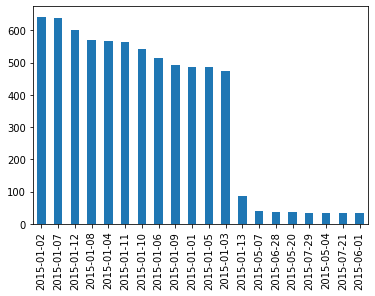

In [32]:
#Top 10 purchase_date with Fraud
fraud_data.loc[fraud_data["class"]==1]['purchase_date'].value_counts()[:20].plot.bar()

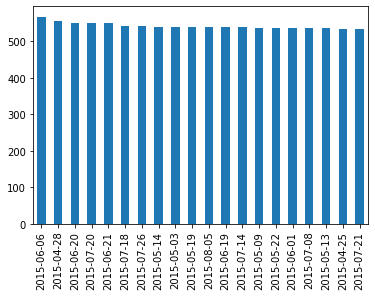

In [33]:
#Top 10 purchase_date with No-Fraud
fraud_data.loc[fraud_data["class"]==0]['purchase_date'].value_counts()[:20].plot.bar()

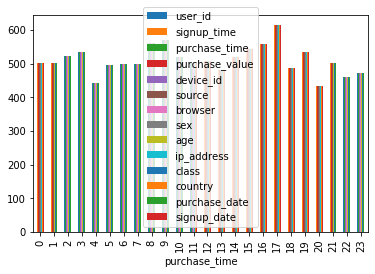

In [34]:
#Bar graph for purchase_time(Fraud)
fraud_data["purchase_time"] = fraud_data['purchase_time'].astype("datetime64")
fraud_data.loc[fraud_data["class"]==1].groupby([fraud_data["purchase_time"].dt.hour]).count().plot(kind="bar")

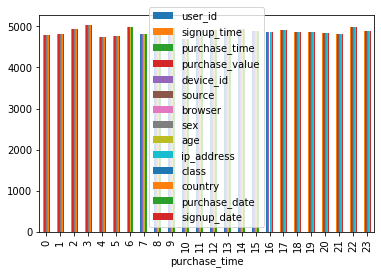

In [35]:
#Bar graph for purchase_time(No-Fraud)
fraud_data["purchase_time"] = fraud_data['purchase_time'].astype("datetime64")
fraud_data.loc[fraud_data["class"]==0].groupby([fraud_data["purchase_time"].dt.hour]).count().plot(kind="bar")

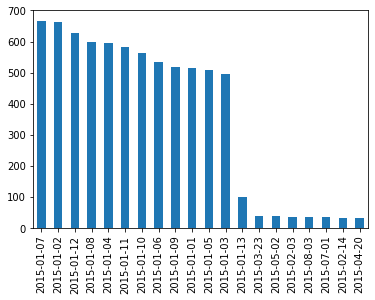

In [36]:
#Top 10 signup_date with Fraud
fraud_data.loc[fraud_data["class"]==1]['signup_date'].value_counts()[:20].plot.bar()

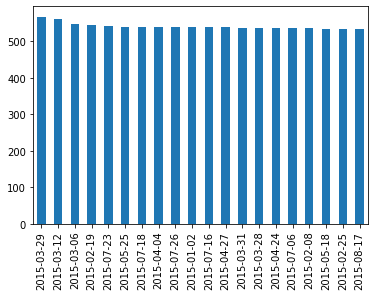

In [37]:
#Top 10 signup_date with No-Fraud
fraud_data.loc[fraud_data["class"]==0]['signup_date'].value_counts()[:20].plot.bar()

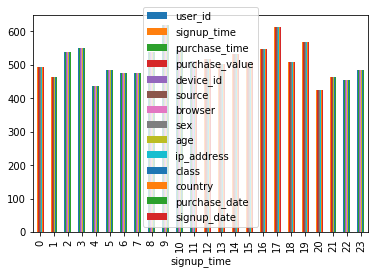

In [38]:
#Bar graph for purchase_time(Fraud)
fraud_data["signup_time"] = fraud_data['signup_time'].astype("datetime64")
fraud_data.loc[fraud_data["class"]==1].groupby([fraud_data["signup_time"].dt.hour]).count().plot(kind="bar")

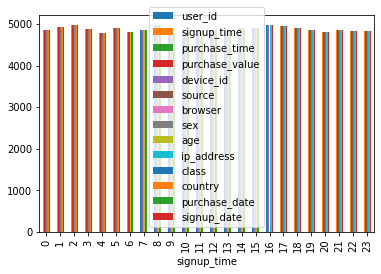

In [39]:
#Bar graph for purchase_time(No-Fraud)
fraud_data["signup_time"] = fraud_data['signup_time'].astype("datetime64")
fraud_data.loc[fraud_data["class"]==0].groupby([fraud_data["signup_time"].dt.hour]).count().plot(kind="bar")

In [40]:
#Converting signup_time,signup_date,purchase_date,purchase_time to numeric values
fraud_data["signup_time"] = fraud_data["signup_time"].astype("datetime64").dt.hour
fraud_data["purchase_time"] = fraud_data["purchase_time"].astype("datetime64").dt.hour
fraud_data["purchase_date"] = fraud_data["purchase_date"].astype("datetime64").astype(int)
fraud_data["signup_date"] = fraud_data["signup_date"].astype("datetime64").astype(int)

fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date,signup_date
0,22058,22,2,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1429315200000000000,1424736000000000000
1,333320,20,1,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1433721600000000000,1433635200000000000
2,1359,18,18,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1420070400000000000,1420070400000000000
4,221365,7,18,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,1441756800000000000,1437436800000000000
5,159135,6,8,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,1436400000000000000,1432166400000000000


In [41]:
#Converting device_id,country to numeric values

device_ids = fraud_data["device_id"].unique()
device_id_dict = {}
for i, device_id in enumerate(device_ids):
    device_id_dict[device_id] = i

fraud_data["device_id"] = fraud_data["device_id"].map(device_id_dict)


countries = fraud_data["country"].unique()
countries_dict = {}
for i, country in enumerate(countries):
    countries_dict[country] = i

fraud_data["country"] = fraud_data["country"].map(countries_dict)

fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date,signup_date
0,22058,22,2,34,0,SEO,Chrome,M,39,7.327584e+08,0,0,1429315200000000000,1424736000000000000
1,333320,20,1,16,1,Ads,Chrome,F,53,3.503114e+08,0,1,1433721600000000000,1433635200000000000
2,1359,18,18,15,2,SEO,Opera,M,53,2.621474e+09,1,1,1420070400000000000,1420070400000000000
4,221365,7,18,39,3,Ads,Safari,M,45,4.155831e+08,0,1,1441756800000000000,1437436800000000000
5,159135,6,8,42,4,Ads,Chrome,M,18,2.809315e+09,0,2,1436400000000000000,1432166400000000000


In [42]:
#Converting sex,source,browser to numeric values

sex = {'M': 1,'F': 2} 
fraud_data.sex = [sex[item] for item in fraud_data.sex]

source = {'SEO': 1,'Ads': 2,'Direct':3}
fraud_data.source = [source[item] for item in fraud_data.source] 

browser = {'Chrome': 1,'Opera': 2,'Safari':3,'IE':4,'FireFox':5} 
fraud_data.browser = [browser[item] for item in fraud_data.browser]

fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_date,signup_date
0,22058,22,2,34,0,1,1,1,39,7.327584e+08,0,0,1429315200000000000,1424736000000000000
1,333320,20,1,16,1,2,1,2,53,3.503114e+08,0,1,1433721600000000000,1433635200000000000
2,1359,18,18,15,2,1,2,1,53,2.621474e+09,1,1,1420070400000000000,1420070400000000000
4,221365,7,18,39,3,2,3,1,45,4.155831e+08,0,1,1441756800000000000,1437436800000000000
5,159135,6,8,42,4,2,1,1,18,2.809315e+09,0,2,1436400000000000000,1432166400000000000


In [43]:
# Balancing the dataset(Undersampling)
frauds = len(fraud_data[fraud_data['class'] == 1])

In [44]:
no_fraud_indices = fraud_data[fraud_data['class'] == 0].index



In [46]:
random_indices = np.random.choice(no_fraud_indices,frauds, replace=False)


In [47]:
fraud_indices = fraud_data[fraud_data['class'] == 1].index



In [48]:
under_sample_indices = np.concatenate([fraud_indices,random_indices])



In [49]:
under_sample = fraud_data.loc[under_sample_indices]



In [50]:
#Dataset balanced for the target variable
under_sample['class'].value_counts()


1    12268
0    12268
Name: class, dtype: int64

In [52]:
#Implementing Random Forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
#Driver Variables
drivers = ['user_id','purchase_date','signup_date','device_id','purchase_value', 'source', 'browser','sex','age','country']  
           

In [54]:
a =under_sample[drivers]
b=under_sample['class']

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [66]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.30)

In [67]:
rf = RandomForestClassifier(n_estimators=10) 
rf.fit(a_train,b_train)
rf_preds= rf.predict(a_test)
print("Precision:",precision_score(b_test,rf_preds))
print("Recall",recall_score(b_test,rf_preds))
print("F1-Score",f1_score(b_test,rf_preds));

Precision: 0.8605655930871956
Recall 0.5883458646616542
F1-Score 0.6988835725677831


In [68]:
from sklearn.metrics import confusion_matrix


In [79]:
def cm(model,a_test,b_test):
    b_preds=model.predict(a_test)
    cmtx = confusion_matrix(b_test,b_preds)

    cmtx_df = pd.DataFrame(cmtx, columns=['Pred No-Fraud','Pred Fraud'],
                           index = ['Actual No-Fraud','Actual Fraud'])
    return cmtx_df

In [80]:
cm(rf,a_test,b_test)


,Pred No-Fraud,Pred Fraud
Actual No-Fraud,3282,355
Actual Fraud,1533,2191
